In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1 :

In [12]:
x1 = np.random.uniform(0, 1, 200)
x2 = np.random.uniform(0, 1, 200)

### Question 2 :

In [13]:
data = pd.DataFrame([x1, x2]).T.rename(columns={0:'x1', 1:'x2'})
data['label'] = ((2*data.x1 + 0.25 - data.x2 > 0) & (-2*data.x1 + 2 - data.x2 > 0)).map({True:'orange', False:'blue'})
data.head()

,x1,x2,label
0,0.615009,0.002467,orange
1,0.432134,0.248065,orange
2,0.771239,0.760760,blue
3,0.455321,0.496307,orange
4,0.083659,0.390845,orange


### Question 3 :

In [14]:
noise1 = np.random.uniform(-1, 1, 200)
noise2 = np.random.uniform(-1, 1, 200)

In [15]:
data1 = data.copy()
data1.x1 = data1.x1 + noise1
data1.x2 = data1.x2 + noise2
data1.head()

,x1,x2,label
0,0.113933,-0.422553,orange
1,-0.518899,0.396713,orange
2,0.023477,1.353927,blue
3,0.729067,0.496688,orange
4,-0.890076,-0.209532,orange


### Question 4 :

(-1.8, 3.5)

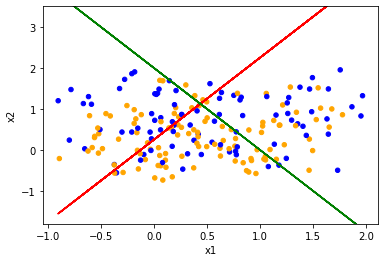

In [16]:
# data1 = data + noise
data1.plot.scatter('x1', 'x2', c=data1.label)
plt.plot(data1.x1, 2*data1.x1 + 0.25, c='red')
plt.plot(data1.x1, -2*data1.x1 + 2, c='green')
plt.ylim([-1.8, 3.5])

Boundaries had the data not been altered

(-0.1, 1.1)

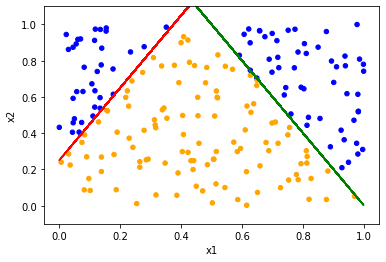

In [17]:
# data1 = data + noise
data.plot.scatter('x1', 'x2', c=data.label)
plt.plot(data.x1, 2*data.x1 + 0.25, c='red')
plt.plot(data.x1, -2*data.x1 + 2, c='green')
plt.ylim([-0.1, 1.1])

### Question 5 :

In [18]:
from sklearn import svm

In [19]:
model = svm.SVC(kernel='linear')
X = data1.loc[:,['x1', 'x2']]
m, y = np.unique(data1.label, return_inverse=True)
model.fit(X, y)

SVC(kernel='linear')

In [20]:
def plot_svc_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

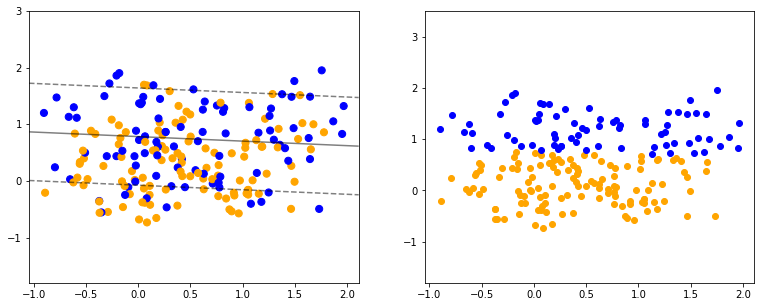

In [21]:
m, y = np.unique(data1.label, return_inverse=True)

fig, ax = plt.subplots(1, 2, figsize=(13,5))

ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.vectorize({1:'orange', 0:'blue'}.get)(y), s=50)
plot_svc_decision_function(model, ax[0])
ax[0].set_ylim([-1.8, 3])

##

y_pred = model.predict(X)
b, c = np.unique(y_pred, return_inverse=True)
mask = c.astype(bool)
temp1 = data1[mask]
temp2 = data1[~mask]
ax[1].scatter(temp1.x1, temp1.x2, c='orange')
ax[1].scatter(temp2.x1, temp2.x2, c='blue')
_=ax[1].set_ylim([-1.8, 3.5])

In [21]:
np.vectorize({1:'orange', 0:'blue'}.get)([0,1,0,1,0,1,1])

array(['blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'orange'],
      dtype='<U6')

### Question 6 :

Knowing that the true form of the boundary is concave, as can be seen in previous cells, the polynomial kernel should be of degree 2

In [22]:
clf_poly = svm.SVC(kernel='poly', degree=2)
clf_poly.fit(X, y)

SVC(degree=2, kernel='poly')

In [23]:
y_pred_poly = clf_poly.predict(X)

(-1.8, 3.5)

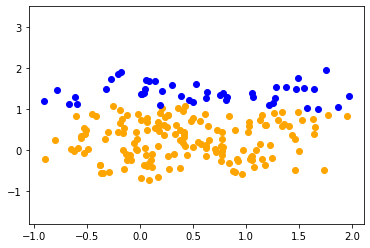

In [27]:
b, c = np.unique(y_pred_poly, return_inverse=True)
mask = c.astype(bool)
temp1 = data1[mask]
temp2 = data1[~mask]
plt.scatter(temp1.x1, temp1.x2, c='orange')
plt.scatter(temp2.x1, temp2.x2, c='blue')
plt.ylim([-1.8, 3.5])

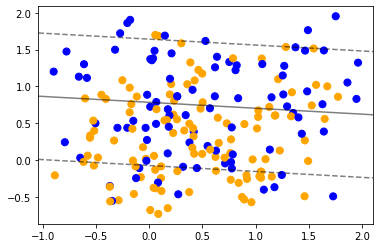

In [29]:
fig, ax = plt.subplots()

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.vectorize({1:'orange', 0:'blue'}.get)(y), s=50)
plot_svc_decision_function(model, ax)

### Question 7 :

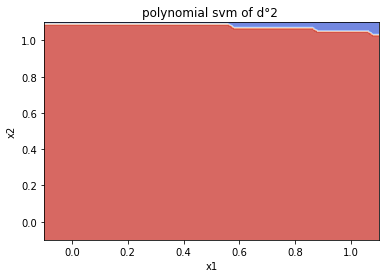

In [39]:
m, y = np.unique(data1.label, return_inverse=True)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='poly', degree=2)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('polynomial svm of d°2 ')
# Set-up grid for plotting.
# X0, X1 = X.x1, X.x2
xx, yy = np.meshgrid(np.arange(-0.1, 1.1, 0.02), np.arange(-0.1, 1.1, 0.02))

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.scatter(xx.ravel(), yy.ravel(), c='yellow', alpha=0)
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title(title)
plt.show()

In [36]:
?plt.scatter